#ASUM-DM


Es un enfoque para la preparación y organización de datos que se enfoca en 5 etapas fundamentales:

Análisis, selección, unificación, muestreo y depuración.

Este proceso es útil para mejorar la calidad de los datos antes de usarlos en modelos de análisis y aprendizaje automático


Contesto el problema:
análisis de clientes para estrategias de marketing personalizada una empresa de servicios financieros quiere lanzar una campaña de marketing personalizada para sus clientes de varias ciudades.
La idea es identificar perfiles de clientes en función de características como edad, ingresos y categoría de cliente para definir estrategias.

El equipo de marketing ha solicitado los analistas de datos e identificar:


segmentos de clientes:
agrupar a los clientes en función de su categoría, ingresos, edad y ciudad.

Tendencias de ingresos:
analizar la distribución de los ingresos mensuales y detectar patrones en diferentes ciudades y edades.

Clientes potenciales:
identificar clientes con altos ingresos y en categoría de alto valor(“A”) para campañas específicas.

Sin embargo, el conjunto de datos tiene varios problemas qué dificultan el análisis directo, cómo duplicados, valores atípicos y errores tipográficos.

Antes de aplicar modelos de segmentación y análisis de tendencias, es necesario limpiar y organizar la información


# 1 Análisis de los datos (A):


Objetivo:

examinar la calidad y característica de los datos.

Acciones:
revisar el conjunto de datos para identificar valores faltantes, datos inconsistentes, duplicados, errores tipográficos y valores atípicos.

Este paso permite entender el tipo de problema que podrían afectar el análisis y decidir cómo resolverlos.


## importar librerias


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## traer datos del csv


In [84]:
dataset = pd.read_csv("clientes_con_errores.csv")
display(dataset.head())

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
0,ID_001,-1.0,NaN,b,NaN,NaN
1,ID_002,NaN,NaN,b,Ciudad_B,Pais_Y
2,ID_003,150.0,7646.28,A,Ciudad_B,NaN
3,ID_004,30.0,-500.00,VIP,Ciudad123,Pais_X
4,ID_005,150.0,NaN,a,ciudad_a,Pais_X


## Descripcion de los datos


In [85]:
# descripcion general de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_cliente       501 non-null    object 
 1   Edad             390 non-null    float64
 2   Ingreso_mensual  257 non-null    float64
 3   Categoría        442 non-null    object 
 4   Ciudad           406 non-null    object 
 5   País             251 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


In [86]:
# cantidad de datos
dataset.count()

ID_cliente         501
Edad               390
Ingreso_mensual    257
Categoría          442
Ciudad             406
País               251
dtype: int64

In [87]:
# edades inconsistentes
# edades validas entre 18 y 90
age_inconsistent = dataset[
    (dataset["Edad"] < 18) | (dataset["Edad"] > 90) | (dataset["Edad"].isnull())
]
# print(age_inconsistent)
age_inconsistent

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
0,ID_001,-1.0,NaN,b,NaN,NaN
1,ID_002,NaN,NaN,b,Ciudad_B,Pais_Y
2,ID_003,150.0,7646.28,A,Ciudad_B,NaN
4,ID_005,150.0,NaN,a,ciudad_a,Pais_X
5,ID_006,-1.0,16558.77,B,NaN,Pais_Y
...,...,...,...,...,...,...
494,ID_495,-1.0,NaN,VIP,NaN,NaN
495,ID_496,-1.0,NaN,A,Ciudad_A,NaN
496,ID_497,-1.0,NaN,a,Ciudad123,NaN
497,ID_498,NaN,NaN,A,Ciudad-C,Pais_Y


In [88]:
# inconsistencias en los nombres de las ciudades
unique_cities = dataset["Ciudad"].dropna().unique()
print("Unique Cities")
print(unique_cities)

Unique Cities
['Ciudad_B' 'Ciudad123' 'ciudad_a' 'Ciudad_A' 'Ciudad-C']


In [89]:
# dimensiones del dataset
dataset.shape

(501, 6)

In [90]:
# Validar si existen datos nulos en el dataset
dataset.isnull().sum()

ID_cliente           0
Edad               111
Ingreso_mensual    244
Categoría           59
Ciudad              95
País               250
dtype: int64

# 2 Selección de los datos (S):


Objetivo: Elegir las variables y los registros más relevantes para el análisis.


Acciones: Determinar qué columna (atributos) y filas (registros) son útiles para el objetivo del análisis.


Eliminar variables redundantes, irrelevantes o registros que no aportan valor lo cual ayuda a mejorar la eficiencia del procesamiento.


Filtrado de flilas(registros):
Eliminar registros que tengan:
Edades fuera del rango razonable (18 a 90).
ingresos no númericos o valores negativos.
categorías de clientes a "A", "B", "C"

"A" cliente de alto valor

"B" cliente de valor medio

"C" cliente de bajo valor


## filtrar datos


In [91]:
# seleccionar columnas utiles
# filtrar valores inconsistentes
# filtrar edades en el rango de 18 a 90

dataset_filtered = dataset[(dataset["Edad"] >= 18) & (dataset["Edad"] <= 90)]

dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
3,ID_004,30.0,-500.0,VIP,Ciudad123,Pais_X
8,ID_009,48.0,-500.0,a,NaN,Pais_Y
10,ID_011,33.0,NaN,B,Ciudad_A,NaN
12,ID_013,54.0,NaN,NaN,ciudad_a,NaN
13,ID_014,81.0,NaN,A,Ciudad_B,NaN
...,...,...,...,...,...,...
488,ID_489,66.0,NaN,B,Ciudad123,Pais_Y
491,ID_492,62.0,NaN,A,Ciudad_B,NaN
492,ID_493,55.0,NaN,NaN,ciudad_a,Pais_Y
499,ID_500,36.0,NaN,A,NaN,NaN


In [92]:
# Transformamos los datos del ingreso mensual a tipo numerico
dataset_filtered["Ingreso_mensual"] = pd.to_numeric(
    dataset_filtered["Ingreso_mensual"], errors="coerce"
)
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 3 to 500
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_cliente       130 non-null    object 
 1   Edad             130 non-null    float64
 2   Ingreso_mensual  62 non-null     float64
 3   Categoría        114 non-null    object 
 4   Ciudad           103 non-null    object 
 5   País             58 non-null     object 
dtypes: float64(2), object(4)
memory usage: 7.1+ KB


C:\Temp\ipykernel_11256\1378422012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["Ingreso_mensual"] = pd.to_numeric(


In [93]:
dataset_filtered = dataset_filtered[dataset_filtered["Ingreso_mensual"] > 0]
dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
18,ID_019,22.0,12422.06,VIP,Ciudad_B,NaN
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
25,ID_026,29.0,11771.21,NaN,Ciudad_B,Pais_Y
42,ID_043,89.0,16732.84,b,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
93,ID_094,72.0,14026.67,VIP,NaN,Pais_X
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,b,Ciudad123,NaN


In [94]:
# cambiar categorias a = A, b = B, c = C
dataset_filtered["Categoría"] = dataset_filtered["Categoría"].replace("a", "A")
dataset_filtered["Categoría"] = dataset_filtered["Categoría"].replace("b", "B")
dataset_filtered["Categoría"] = dataset_filtered["Categoría"].replace("c", "C")
dataset_filtered

C:\Temp\ipykernel_11256\128596515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["Categoría"] = dataset_filtered["Categoría"].replace("a", "A")
C:\Temp\ipykernel_11256\128596515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered["Categoría"] = dataset_filtered["Categoría"].replace("b", "B")
C:\Temp\ipykernel_11256\128596515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
18,ID_019,22.0,12422.06,VIP,Ciudad_B,NaN
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
25,ID_026,29.0,11771.21,NaN,Ciudad_B,Pais_Y
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
93,ID_094,72.0,14026.67,VIP,NaN,Pais_X
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN


In [95]:
# filtrar las categorias validas
valid_categories = ["A", "B", "C"]
dataset_filtered = dataset_filtered[
    dataset_filtered["Categoría"].isin(valid_categories)
]
dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,Ciudad_A,NaN
42,ID_043,89.0,16732.84,B,Ciudad123,NaN
51,ID_052,54.0,13878.16,B,Ciudad_A,NaN
57,ID_116,78.0,5799.32,A,Ciudad123,NaN
76,ID_077,26.0,6953.78,B,Ciudad123,NaN
106,ID_107,24.0,3797.23,C,Ciudad_B,Pais_X
125,ID_126,56.0,5685.07,B,Ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,Ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [96]:
# ver ID_cliente duplicados en el dataset filtrado

duplicated = dataset_filtered[
    dataset_filtered.duplicated(subset=["ID_cliente"], keep=False)
]["ID_cliente"].unique()
duplicated

array([], dtype=object)

In [97]:
# ver ID_cliente duplicados en el dataset original

duplicated = dataset_filtered[dataset.duplicated(subset=["ID_cliente"], keep=False)][
    "ID_cliente"
].unique()
duplicated

C:\Temp\ipykernel_11256\4132191981.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicated = dataset_filtered[dataset.duplicated(subset=["ID_cliente"], keep=False)][


array(['ID_116', 'ID_107', 'ID_155', 'ID_188', 'ID_203', 'ID_246',
       'ID_332'], dtype=object)

In [98]:
# eliminar duplicados
dataset_filtered = dataset_filtered.drop_duplicates(subset=["ID_cliente"])

In [99]:
# contar valores duplicados en la columna ID_cliente por cada ID
duplicated_counts = dataset["ID_cliente"].value_counts()
duplicated_counts
# tienen mas de 1
# duplicated_counts = duplicated_counts[duplicated_counts > 1]
# duplicated_counts


ID_cliente
ID_045    4
ID_116    3
ID_120    3
ID_129    3
ID_184    3
         ..
ID_474    1
ID_475    1
ID_019    1
ID_020    1
ID_463    1
Name: count, Length: 453, dtype: int64

# 3 Unificación y normalización de valores(U)


Estandarizar los nombre de ciudades para tener consistencia en los datos y facilitar el análisis posterir.
pasos:
Normalización de los nombres de ciudades: Convertir todos los nombres a un formato consistente ,eliminar errores tipográficos y variaciones en mayúsculas/minúsculas también corregiremos cualquier variación que deba agruparse
Ejemplos:
"Ciudad_A" y "ciudad_a deben ser iguales


In [100]:
# normalizar los nombres de las ciudades
# convertir en minusculas y eliminar espacios extras
dataset_filtered["Ciudad"] = dataset_filtered["Ciudad"].str.lower().str.strip()
dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad123,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad123,NaN
76,ID_077,26.0,6953.78,B,ciudad123,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad123,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad123,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [101]:
# corregir variaciones en los nombres de las ciudad
dataset_filtered["Ciudad"] = dataset_filtered["Ciudad"].replace(
    {
        "ciudad-a": "ciudad_a",
        "ciudad123": "ciudad_a",
        "ciudad-b": "ciudad_b",
        "ciudad-c": "ciudad_c",
    }
)
dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
138,ID_139,57.0,1861.35,A,NaN,Pais_X
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
154,ID_155,51.0,1749.90,C,NaN,NaN


In [102]:
# verificar las ciudad unicas despues de la correccion
cities_uniques = dataset_filtered["Ciudad"].dropna().unique()
print(cities_uniques)

['ciudad_a' 'ciudad_b' 'ciudad_c']


In [103]:
# eliminar ciudades con valores nulos
dataset_filtered = dataset_filtered.dropna(subset=["Ciudad"])
dataset_filtered

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
20,ID_021,29.0,3584.98,C,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
51,ID_052,54.0,13878.16,B,ciudad_a,NaN
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
106,ID_107,24.0,3797.23,C,ciudad_b,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
155,ID_156,74.0,17520.34,B,ciudad_b,Pais_X
230,ID_246,70.0,11927.53,A,ciudad_a,NaN


# 4 Muestreo representativo(M):


Si es necesario, crear un subconjunto de dotos representativos para pruebas iniciales de segmentación
pasos:

Definir el tamaño de la Muestra:

Asegurar representatividad en categorías clave:

Revisar y validar la muestra:


In [104]:
print(len(dataset_filtered))

20


In [105]:
# definir tamaño de la muestra
# 10% del dataset
# sample_size = int(0.1 * len(dataset_filtered))
sample_size = int(1 * len(dataset_filtered))

In [106]:
# Realizar el muesteo estratificado
# Utilizaremos las columnas Categoría y ciudad como estratos para asegurar representavilidad
sample = dataset_filtered.groupby(["Categoría", "Ciudad"], group_keys=False).apply(
    lambda x: x.sample(
        min(len(x), sample_size // len(dataset_filtered["Categoría"].unique()))
    )
)
sample

C:\Temp\ipykernel_11256\960229989.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = dataset_filtered.groupby(["Categoría", "Ciudad"], group_keys=False).apply(


,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X


In [107]:
# Distribucion de la muestra
print("\n Distribución de la muestra por categorías")
print(sample["Categoría"].value_counts())
print("\n Distribución de la muestra por ciudad")
print(
    sample["Ciudad"].value_counts(normalize=True)
)  # devulve valores entre 0 y  1 reprecenta %


 Distribución de la muestra por categorías
Categoría
B    10
A     5
C     2
Name: count, dtype: int64

 Distribución de la muestra por ciudad
Ciudad
ciudad_a    0.705882
ciudad_b    0.235294
ciudad_c    0.058824
Name: proportion, dtype: float64


In [108]:
print("Distribución de la muestra por rango de edad:")
print(
    pd.cut(sample["Edad"], bins=[18, 30, 40, 50, 60, 90]).value_counts(normalize=True)
)

Distribución de la muestra por rango de edad:
Edad
(60, 90]    0.3125
(18, 30]    0.2500
(30, 40]    0.2500
(50, 60]    0.1250
(40, 50]    0.0625
Name: proportion, dtype: float64


# 5 Depuración final (D):


In [109]:
# deteccion y tratamiento de valores atipicos
# calculo del rango intercuatilico para la deteccion de valores atipicos
Q1 = sample["Ingreso_mensual"].quantile(0.25)
Q3 = sample["Ingreso_mensual"].quantile(0.75)

IQR = Q3 - Q1

# definir limites para valores atipicos
inferior_lim = Q1 - 1.5 * IQR
superior_lim = Q3 + 1.5 * IQR

In [110]:
print(inferior_lim, superior_lim)
print(IQR)

-7196.154999999999 27092.445
8572.15


In [111]:
# filtrar valores atipicos fuera de los limites y reemplazarlos con NaN para trabajarlos posteriormente
sample["Ingreso_mensual"] = sample["Ingreso_mensual"].apply(
    lambda x: x if inferior_lim <= x <= superior_lim else np.nan
)
sample

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País
57,ID_116,78.0,5799.32,A,ciudad_a,NaN
272,ID_273,36.0,5662.07,A,ciudad_a,NaN
393,ID_394,58.0,7439.77,A,ciudad_a,NaN
230,ID_246,70.0,11927.53,A,ciudad_a,NaN
249,ID_250,45.0,12777.62,A,ciudad_a,NaN
76,ID_077,26.0,6953.78,B,ciudad_a,NaN
42,ID_043,89.0,16732.84,B,ciudad_a,NaN
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X
125,ID_126,56.0,5685.07,B,ciudad_a,NaN
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X


In [112]:
# mostrar cantidad de valores atipicos
print(sample["Ingreso_mensual"].isna().sum())

0


In [113]:
# rellenar valores NaN en "Ingreso_mensual" con la mediana de la muestra
median_income = sample["Ingreso_mensual"].median()
sample["Ingreso_mensual"].fillna(median_income, inplace=True)

C:\Temp\ipykernel_11256\2412148128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample["Ingreso_mensual"].fillna(median_income, inplace=True)


In [114]:
# normalizacion de los datos con el metodo min-max
sample["Ingreso_mensual_normalizado"] = (
    sample["Ingreso_mensual"] - sample["Ingreso_mensual"].min()
) / (sample["Ingreso_mensual"].max() - sample["Ingreso_mensual"].min())
sample

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
57,ID_116,78.0,5799.32,A,ciudad_a,NaN,0.242899
272,ID_273,36.0,5662.07,A,ciudad_a,NaN,0.234282
393,ID_394,58.0,7439.77,A,ciudad_a,NaN,0.345888
230,ID_246,70.0,11927.53,A,ciudad_a,NaN,0.627636
249,ID_250,45.0,12777.62,A,ciudad_a,NaN,0.681005
76,ID_077,26.0,6953.78,B,ciudad_a,NaN,0.315377
42,ID_043,89.0,16732.84,B,ciudad_a,NaN,0.929319
153,ID_154,31.0,14234.22,B,ciudad_a,Pais_X,0.772452
125,ID_126,56.0,5685.07,B,ciudad_a,NaN,0.235726
331,ID_332,37.0,2903.06,B,ciudad_a,Pais_X,0.061068


In [115]:
# asegurar que la columna "Edad" no tenga valores atipicos fuera del rango  (18 a 90)
sample["Edad"] = sample["Edad"].apply(lambda x: x if 18 <= x <= 90 else None)

In [116]:
# asegurar que Categorias y ciudad esten en un formato consistente
sample["Categoría"] = sample["Categoría"].str.upper()
sample["Ciudad"] = sample["Ciudad"].str.capitalize()
sample

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado
57,ID_116,78.0,5799.32,A,Ciudad_a,NaN,0.242899
272,ID_273,36.0,5662.07,A,Ciudad_a,NaN,0.234282
393,ID_394,58.0,7439.77,A,Ciudad_a,NaN,0.345888
230,ID_246,70.0,11927.53,A,Ciudad_a,NaN,0.627636
249,ID_250,45.0,12777.62,A,Ciudad_a,NaN,0.681005
76,ID_077,26.0,6953.78,B,Ciudad_a,NaN,0.315377
42,ID_043,89.0,16732.84,B,Ciudad_a,NaN,0.929319
153,ID_154,31.0,14234.22,B,Ciudad_a,Pais_X,0.772452
125,ID_126,56.0,5685.07,B,Ciudad_a,NaN,0.235726
331,ID_332,37.0,2903.06,B,Ciudad_a,Pais_X,0.061068


# 6 con los datos organizados y depurados:


Aplicar técnicas de segmentación de clientes para identificar distintos perfiles dentro del conjunto de datos.


In [117]:
# Metodo del codo para determinar el numero optimo de clusters
le = LabelEncoder()
sample["City_code"] = le.fit_transform(sample["Ciudad"])
X = sample[["Edad", "Ingreso_mensual", "City_code"]]

WCSS = []

for k in range(1, 11):
    kpp = KMeans(n_clusters=k, random_state=0).fit(X)
    WCSS.append(kpp.inertia_)

In [118]:
sample

,ID_cliente,Edad,Ingreso_mensual,Categoría,Ciudad,País,Ingreso_mensual_normalizado,City_code
57,ID_116,78.0,5799.32,A,Ciudad_a,NaN,0.242899,0
272,ID_273,36.0,5662.07,A,Ciudad_a,NaN,0.234282,0
393,ID_394,58.0,7439.77,A,Ciudad_a,NaN,0.345888,0
230,ID_246,70.0,11927.53,A,Ciudad_a,NaN,0.627636,0
249,ID_250,45.0,12777.62,A,Ciudad_a,NaN,0.681005,0
76,ID_077,26.0,6953.78,B,Ciudad_a,NaN,0.315377,0
42,ID_043,89.0,16732.84,B,Ciudad_a,NaN,0.929319,0
153,ID_154,31.0,14234.22,B,Ciudad_a,Pais_X,0.772452,0
125,ID_126,56.0,5685.07,B,Ciudad_a,NaN,0.235726,0
331,ID_332,37.0,2903.06,B,Ciudad_a,Pais_X,0.061068,0


Text(0, 0.5, 'WCSS')

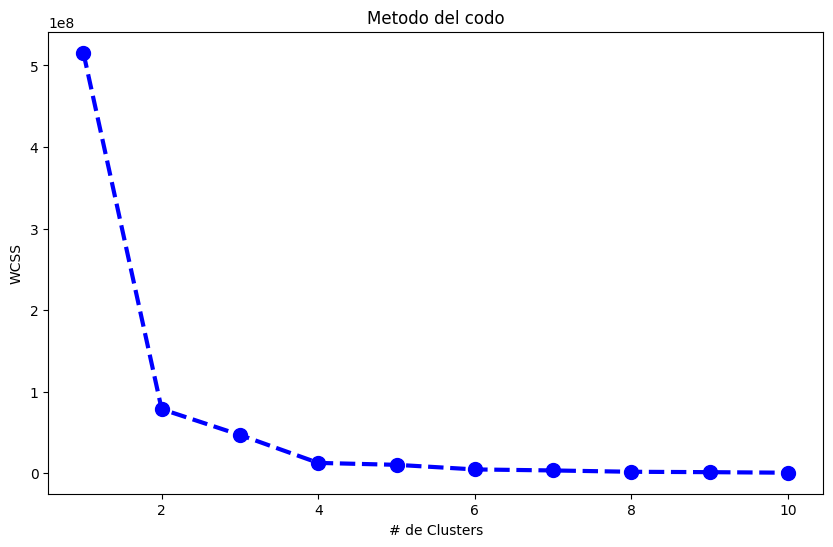

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 11),
    WCSS,
    "o--",
    color="blue",
    markersize=10,
    linewidth=3,
)
plt.title("Metodo del codo")
plt.xlabel(
    "# de Clusters",
)
plt.ylabel("WCSS")

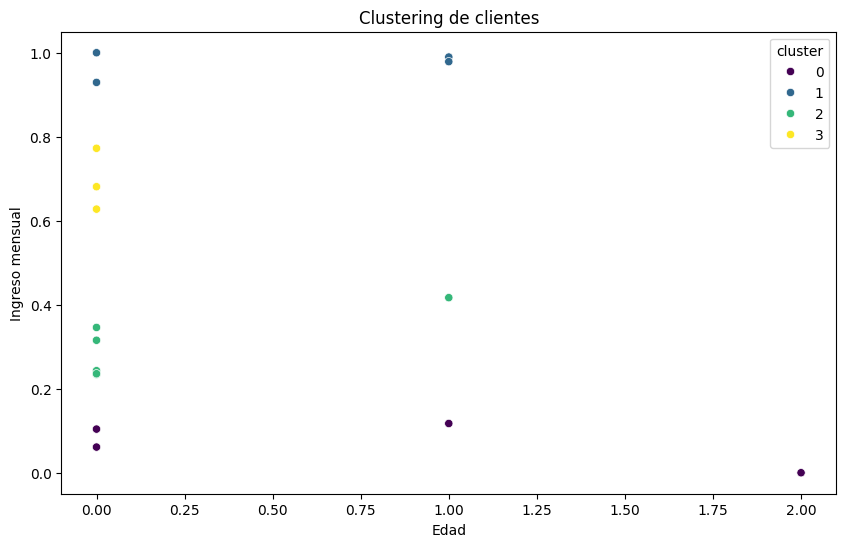

In [120]:
# aplicar k means con el numero optimo de clusters
kmeans = KMeans(n_clusters=4, random_state=0)
sample["cluster"] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample,
    x="City_code",
    y="Ingreso_mensual_normalizado",
    hue="cluster",
    palette="viridis",
)
plt.title("Clustering de clientes")
plt.xlabel("Edad")
plt.ylabel("Ingreso mensual")
plt.show()